In [1]:
import pandas as pd #libray for data analysis and data manipulation
import numpy as np #library for mathematical computation on lists and other data structure
import matplotlib.pyplot as plt #plotting for data visualization
import seaborn as sns #library for data visualization

## OVERVIEW OF THE MODEL

## loading the data and data cleaning

In [2]:
#loading the the dataset using the pandas readcsv function
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,ISLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,ISLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# calculating the missing value in our data
missing_values = data.isnull().sum()

# calculate the percentage of missing values in our data
missing_perc = (missing_values / len(data)) * 100

# display the missing value and percentage

print("\n The sumamation of missing value in each column:\n", missing_values)
print("\n The percentage of missing value in data:\n", missing_perc)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
data.dropna(inplace=True)
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [4]:
data["ocean_proximity"].unique() # removing the non value data in our dataset to avoid biased model

array(['NEAR BAY', '<1H OCEAN', 'ISLAND', 'INLAND', 'NEAR OCEAN'],
      dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis=1) #independent variables
y = data["median_house_value"] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #initializing the training data and allocating 20% to test data

In [6]:
train_data = X_train.join(y_train)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

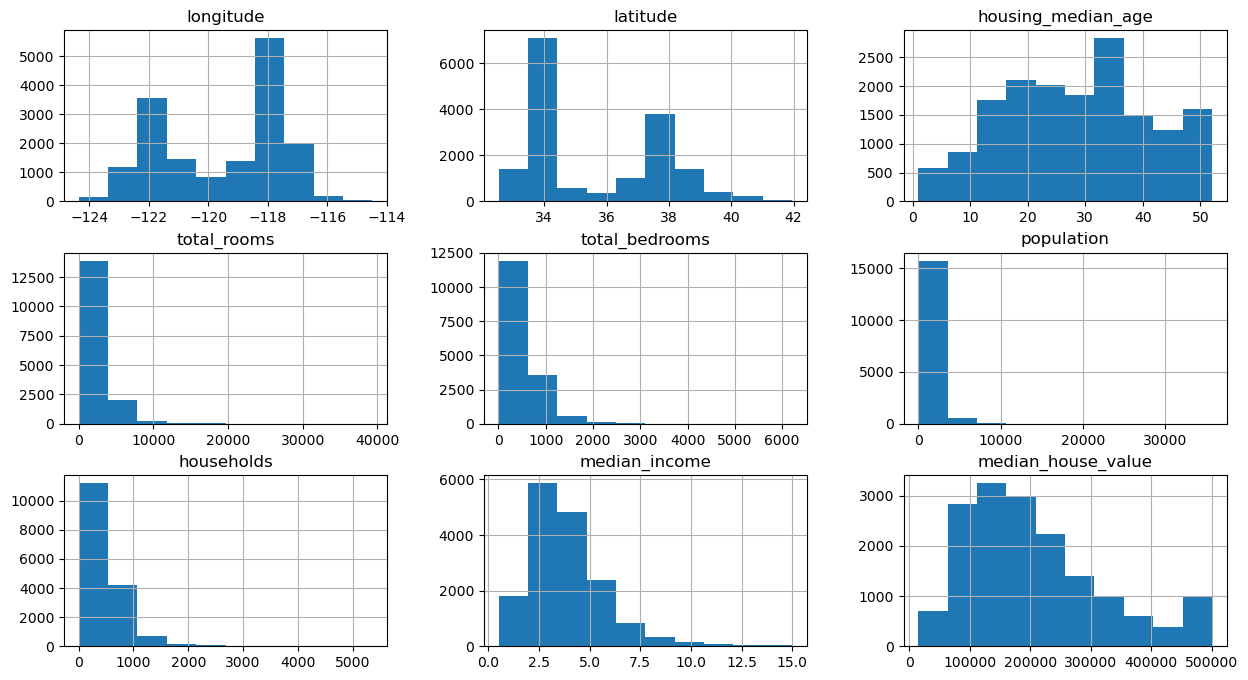

In [7]:
train_data.hist(figsize=(15, 8))

In [8]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

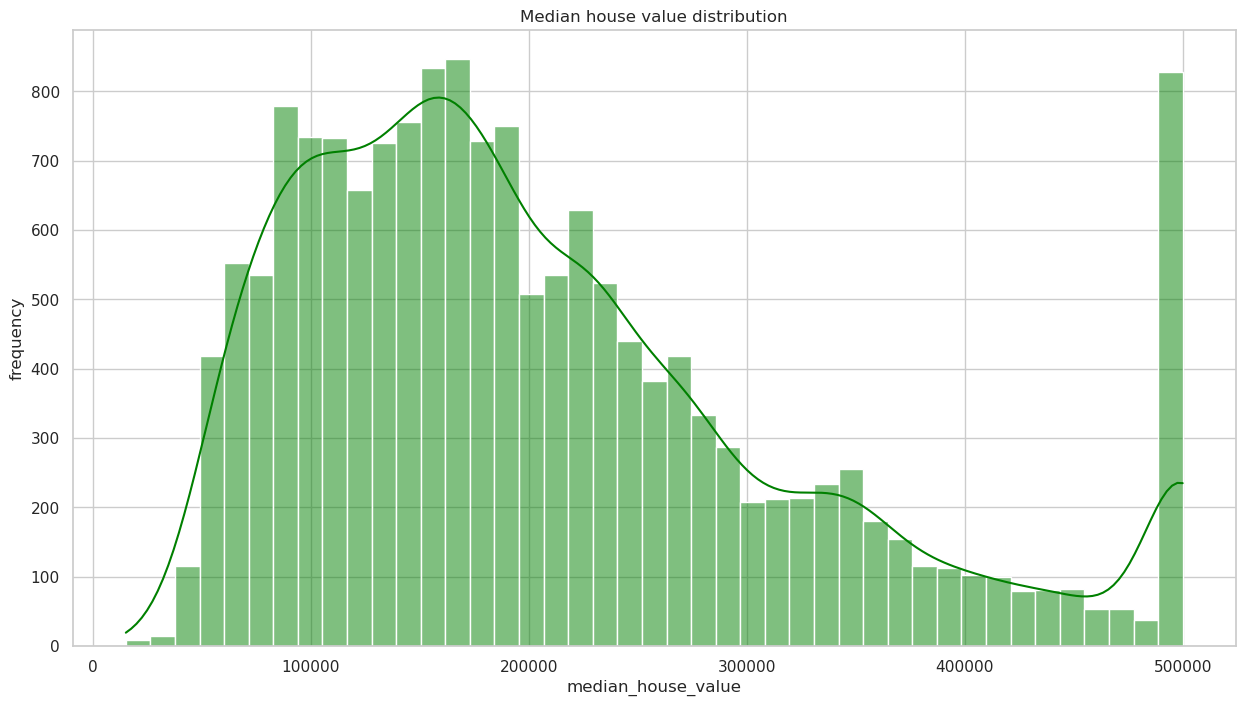

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.histplot(train_data["median_house_value"], kde=True, color="green")
plt.title("Median house value distribution")
plt.xlabel("median_house_value")
plt.ylabel("frequency")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

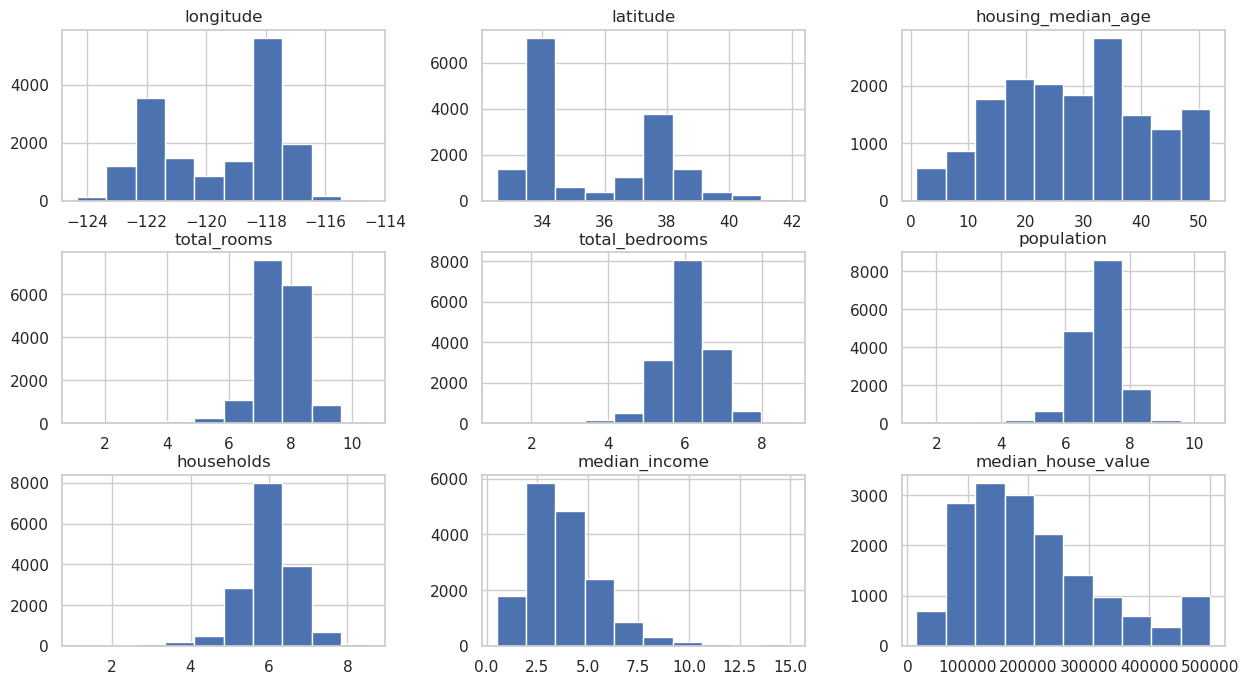

In [10]:
train_data.hist(figsize=(15, 8))

In [11]:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"])).drop(["ocean_proximity"], axis=1)

<Axes: >

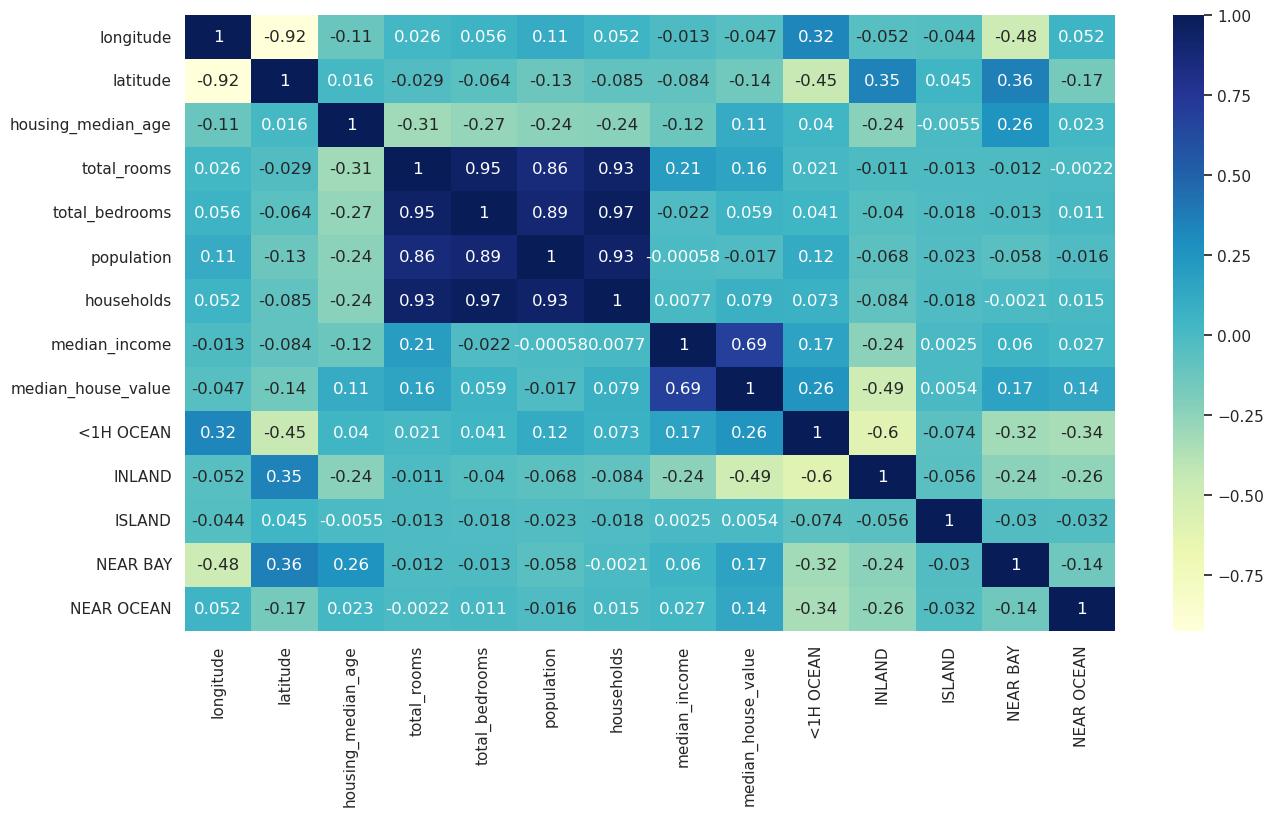

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") #to visualize the correlation of each features of the data 

## feature engineering
to avoid collinearity between the independent variables

In [14]:
# creating bedroom ratio from our Tbedroom and Trooms features
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

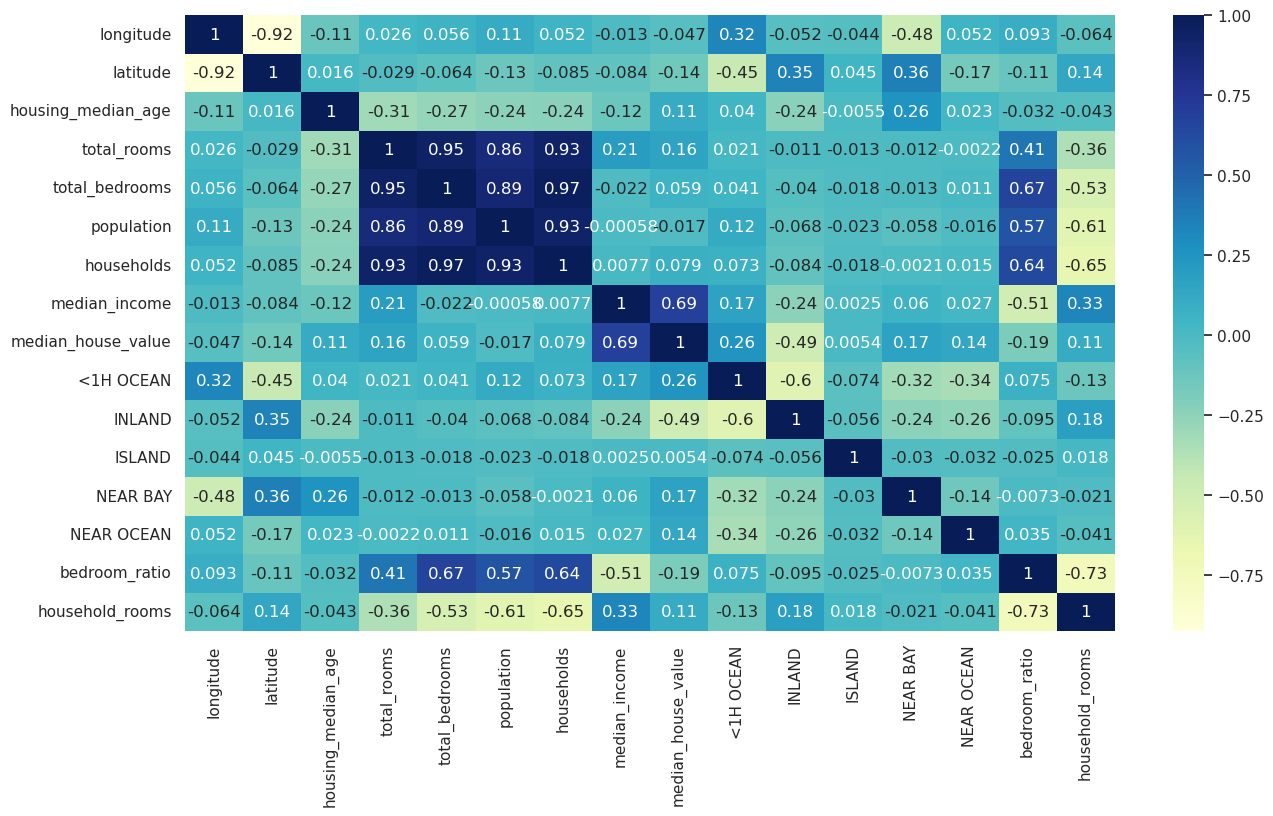

In [15]:
# plotting the correlation of the features including the new added features
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## model training
training the model from the training data

In [17]:
# fitting the data into the linearRegression machine learning algorithm to extract patterns and calculate the coeffiecient for the line of best fit
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

## adding the same features to the test model to ensure compatibility during testing

In [18]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [19]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

## prediction using the fited model

In [20]:
reg.predict(X_test[:10]) # predicting the first 10 testing data input features

array([181360.0222832 , 192139.59507525, 278946.92924493, 177110.27608121,
       163350.39724972, 110607.8106057 , 337736.35860271, 260440.90840251,
       242483.5717765 , 236155.98477113])

## Performance Metric
Using score function to calculate the performance of the mode on unseen data

In [21]:
reg.score(X_test, y_test)

0.6624801216254845

## Using the RandomForestRegressor to train the model


In [22]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
forest.predict(X_test[:10]) #predicting the first 10 input features using the RandomForestRegressor

array([150462.  , 193745.  , 277206.  , 166564.  , 141406.02, 146523.  ,
       409031.24, 264176.02, 226066.  , 172513.  ])

In [24]:
forest.score(X_test, y_test) # more efiicient compared to the linear regression in this model

0.7986580919523224

## Cross validation and hyper parameter tuning 
Using the gridsearchCV from model selection class from scikit-learn library 

In [29]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [50,100,150],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

In [27]:
best_forest = grid_search.best_estimator_

In [28]:
best_forest.score(X_test, y_test)

0.8019826871363496